In [29]:
%cd ~/NetBeansProjects/ExpLosion/
from notebooks.common_imports import *

from gui.user_code import get_demsar_diagram, pairwise_significance_exp_ids
from gui.output_utils import *

sns.timeseries.algo.bootstrap = my_bootstrap
sns.categorical.bootstrap = my_bootstrap

/Volumes/LocalDataHD/m/mm/mmb28/NetBeansProjects/ExpLosion


# word2vec vs glove vs count @ wikipedia

wins [27, 29, 28, 30] 
glove [97, 99, 98, 100] 
w2v [34, 36, 35, 37]
id 27, score 0.44
id 29, score 0.31
id 28, score 0.41
id 30, score 0.31
id 97, score 0.45
id 99, score 0.32
id 98, score 0.39
id 100, score 0.32
id 34, score 0.53
id 36, score 0.35
id 35, score 0.47
id 37, score 0.34


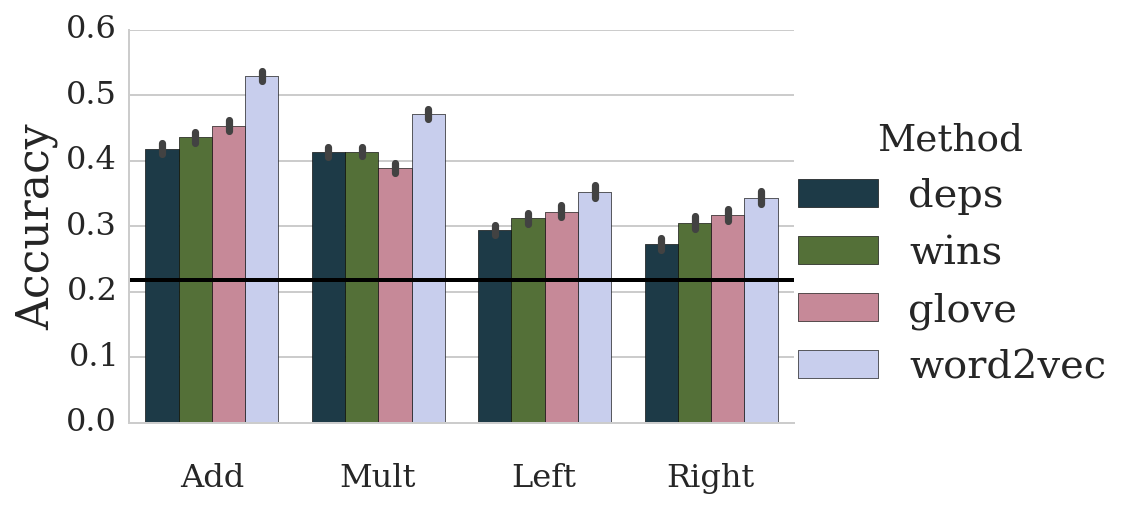

In [23]:
d = {'expansions__noise': 0.0, 
     'expansions__decode_handler': 'SignifiedOnlyFeatureHandler', 
     'expansions__k': 3, 
     'expansions__vectors__rep': 0,
     'expansions__vectors__unlabelled_percentage': 100.0,
     'expansions__vectors__unlabelled' : 'wiki',
     'expansions__allow_overlap': 0,
     'labelled': 'amazon_grouped-tagged', 
     'expansions__vectors__algorithm': 'word2vec', 
     'document_features_tr': 'J+N+AN+NN',
     'document_features_ev': 'AN+NN',
     'expansions__vectors__unlabelled_percentage':100,
     'expansions__entries_of':None,
     'expansions__vectors__composer__in': ['Add', 'Mult', 'Right', 'Left']
    }

def _get(d):
    return [x.id for x in Experiment.objects.filter(**d).\
            order_by('expansions__vectors__algorithm', 'expansions__vectors__composer')]

w2v = _get(d)
d['expansions__vectors__algorithm'] =  'glove'
glove = _get(d)
d['expansions__vectors__algorithm'] =  'count_windows'
wins = _get(d)
d['expansions__vectors__algorithm'] =  'count_dependencies'
deps = _get(d)

print('wins', wins, '\nglove', glove, '\nw2v', w2v)
horder = ['deps', 'wins', 'glove', 'word2vec']
xorder = ['Add', 'Mult', 'Left', 'Right']
with sns.color_palette("cubehelix", 4):
    diff_plot_bar(  [deps, wins, glove, w2v], horder,
                    [Experiment.objects.get(id=id).expansions.vectors.composer for id in w2v],
                    xlabel='', hline_at=random_vect_baseline(),
hue_order=horder, order=xorder)
plt.savefig('plot-w2v-vs-glove.pdf', format='pdf', dpi=300, bbox_inches='tight', pad_inches=0.1)

# sanity check
from itertools import chain
for id in chain.from_iterable([wins, glove, w2v]):
    print('id %d, score %.2f'%(id, Results.objects.get(id=id, classifier=CLASSIFIER).accuracy_mean))

# Are differences significant? 

In [32]:
pairwise_significance_exp_ids(zip(wins,deps), ['expansions__vectors__composer', 
                                              'expansions__vectors__algorithm'])

Running significance for (27, 23)
Running significance for (29, 25)
Running significance for (28, 24)
Running significance for (30, 26)


,name1,acc1,name2,acc2,mean_diff,pval,significant
0,Add-W,0.435622,Add-D,0.417025,0.018597,0.006,True
1,Left-W,0.311557,Left-D,0.293303,0.018255,0.004,True
2,Mult-W,0.414005,Mult-D,0.413615,0.000390,0.930,False
3,Right-W,0.305452,Right-D,0.272408,0.033044,0.000,True


In [33]:
pairwise_significance_exp_ids(zip(wins,glove), ['expansions__vectors__composer', 
                                              'expansions__vectors__algorithm'])

Running significance for (27, 97)
Running significance for (29, 99)
Running significance for (28, 98)
Running significance for (30, 100)


,name1,acc1,name2,acc2,mean_diff,pval,significant
0,Add-W,0.435622,Add-glove,0.453605,0.017983,0.008,True
1,Left-W,0.311557,Left-glove,0.322349,0.010791,0.104,False
2,Mult-W,0.414005,Mult-glove,0.388307,0.025698,0.000,True
3,Right-W,0.305452,Right-glove,0.316368,0.010916,0.080,False
